In [46]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

What is split,apply, and combine?
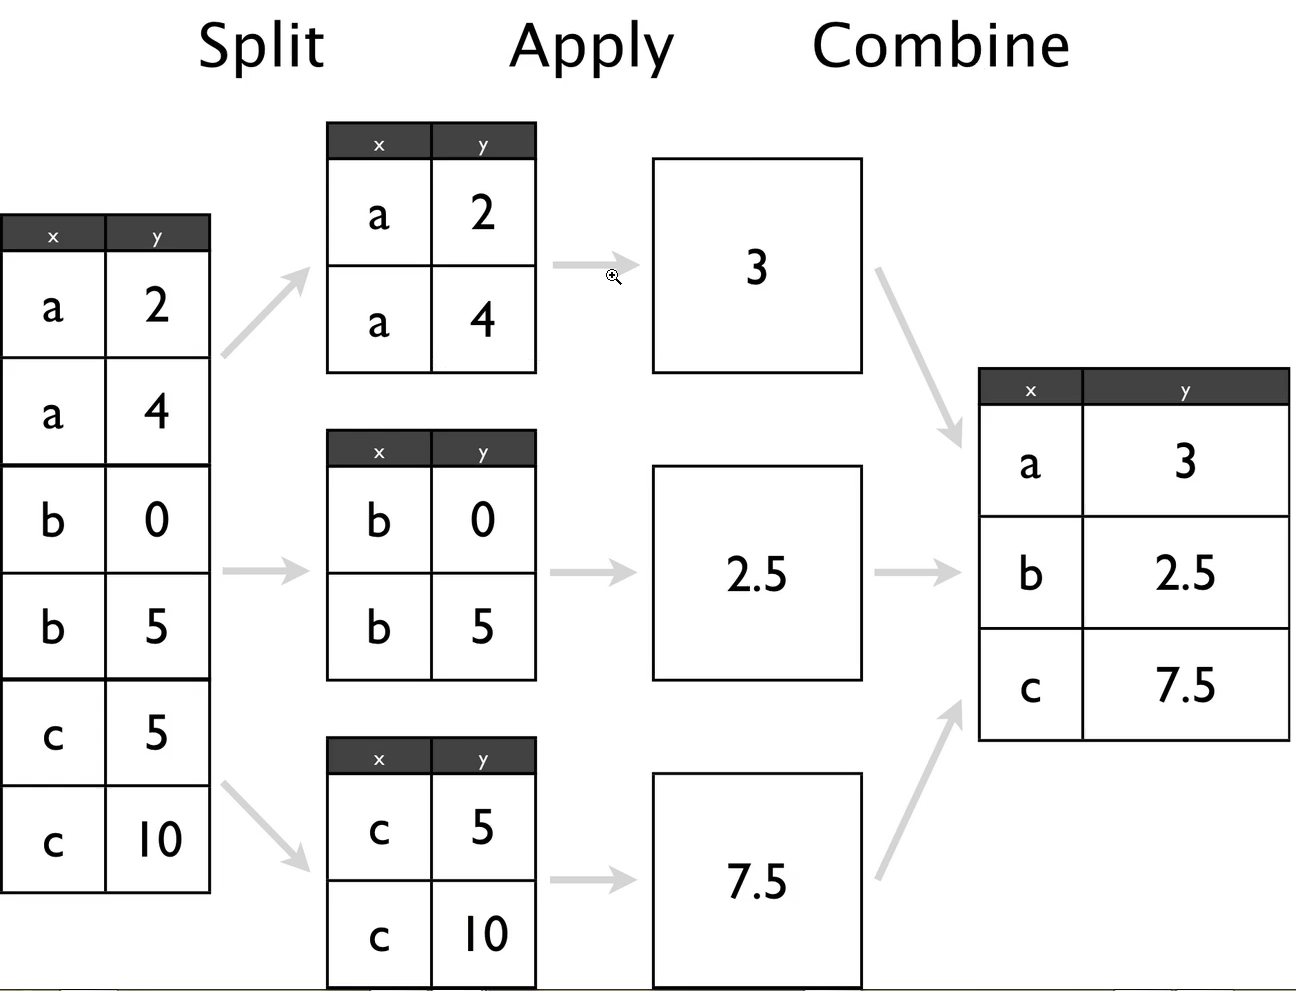
split, group by unique values or a certain index :
apply, some function (average, count, etc) :
combine, results for each group in a single column

In [47]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [48]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
#Find the highest alcohol content wine for each quality range
#Ranker function assigns a rank to each quality of wine based on alcohol content with 1 being the highest alc content
# +1 so that the highest wouldn't be 0
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [50]:
#Sort function now split into sort_values and sort_index
#ranker function now works since table is sorted
dframe_wine.sort_values('alcohol',ascending=False,inplace=True)

In [51]:
#Applies ranker for each group by in quality
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

Sorted by highest alcohol content

In [52]:
#Using groupby to see how many values are in each quality group
num_of_qual = dframe_wine['quality'].value_counts()

In [53]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [54]:
#Combine to show the highest alcohol content for the respective quality ranks
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


In [ ]:
#The highest alcohol content for each quality group